In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

For reference, a brief description of the dataset is provided

<small style="font-size:14px; font-weight:lighter; color:white;">
1. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">baseline value</span>: The baseline fetal heart rate (FHR) in beats per minute.<br>
2. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">accelerations</span>: Number of accelerations per second, which are temporary increases in FHR.<br>
3. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">fetal_movement</span>: Number of fetal movements per second.<br>
4. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">uterine_contractions</span>: Number of uterine contractions per second.<br>
5. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">light_decelerations</span>: Number of light decelerations per second, which are temporary decreases in FHR.<br>
6. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">severe_decelerations</span>: Number of severe decelerations per second.<br>
7. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">prolongued_decelerations</span>: Number of prolonged decelerations per second.<br>
8. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">abnormal_short_term_variability</span>: Percentage of time with abnormal short-term variability in FHR.<br>
9. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">mean_value_of_short_term_variability</span>: Mean value of short-term variability in FHR.<br>
10. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">percentage_of_time_with_abnormal_long_term_variability</span>: Percentage of time with abnormal long-term variability in FHR.<br>
11. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">mean_value_of_long_term_variability</span>: Mean value of long-term variability in FHR.<br>
12. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_width</span>: Width of the histogram of FHR values.<br>
13. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_min</span>: Minimum value in the histogram of FHR values.<br>
14. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_max</span>: Maximum value in the histogram of FHR values.<br>
15. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_number_of_peaks</span>: Number of peaks in the histogram of FHR values.<br>
16. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_number_of_zeroes</span>: Number of zeroes in the histogram of FHR values.<br>
17. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_mode</span>: Mode of the histogram of FHR values.<br>
18. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_mean</span>: Mean value of the histogram of FHR values.<br>
19. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_median</span>: Median value of the histogram of FHR values.<br>
20. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_variance</span>: Variance of the histogram of FHR values.<br>
21. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_tendency</span>: Tendency of the histogram of FHR values (e.g., skewness).<br>
22. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">fetal_health</span>: The target variable indicating the health status of the fetus (<i>1: Normal</i>, <i>2: Suspect</i>, <i>3: Pathological</i>).
</small>

In [2]:
df = pd.read_csv("../data/fetal_health.csv")
pd.set_option('display.max_columns', 50)

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
df.shape

(2126, 22)

In [8]:
df.duplicated().sum()

np.int64(13)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(2113, 22)

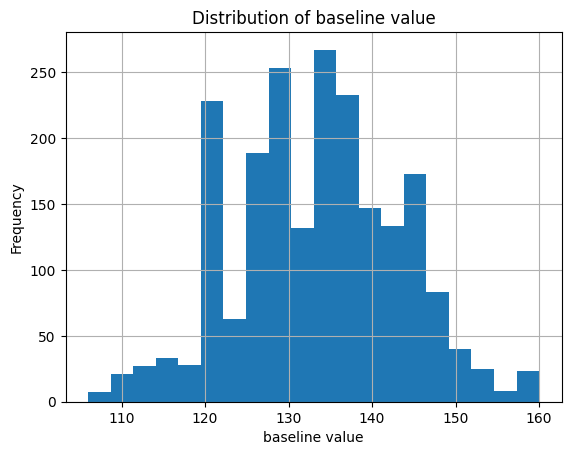

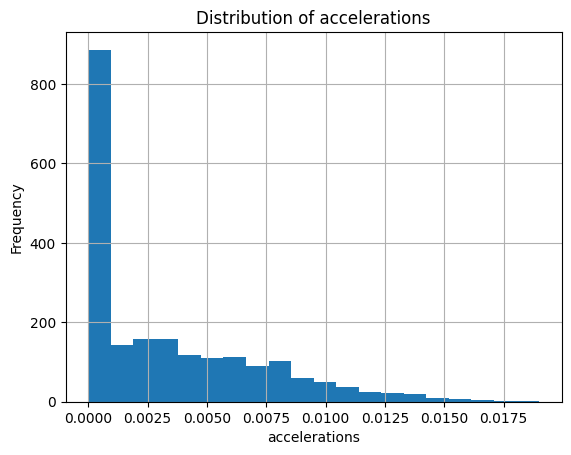

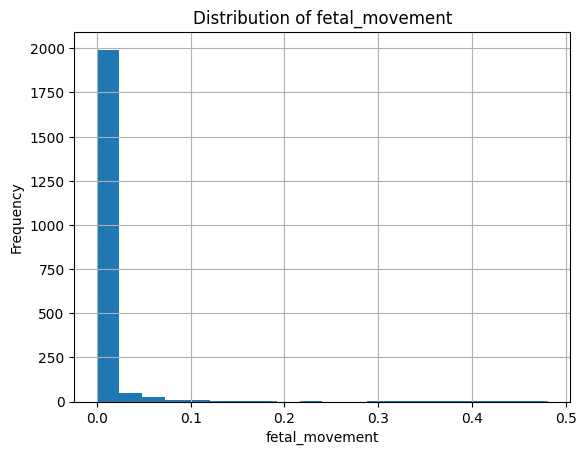

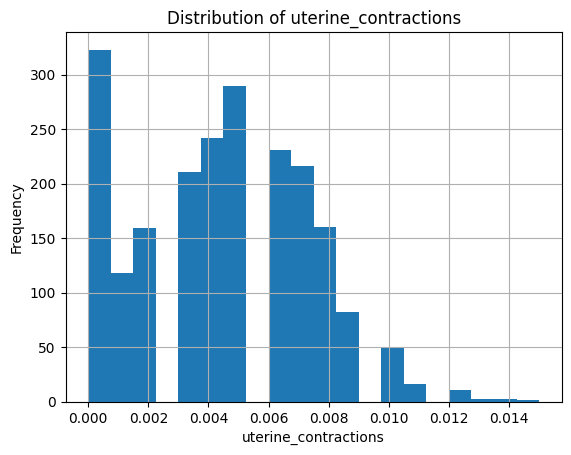

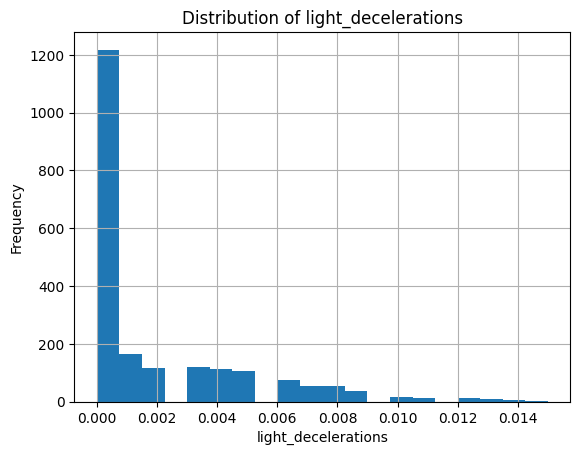

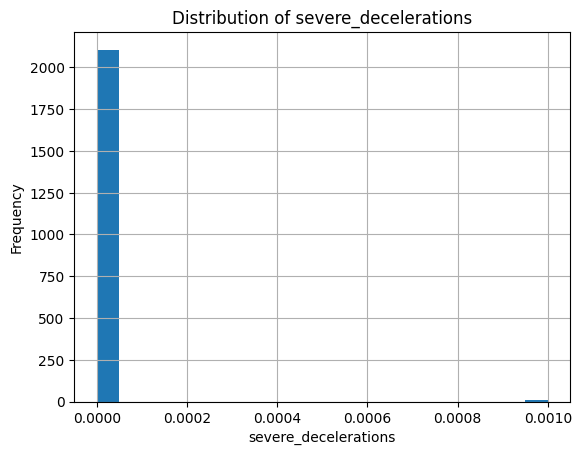

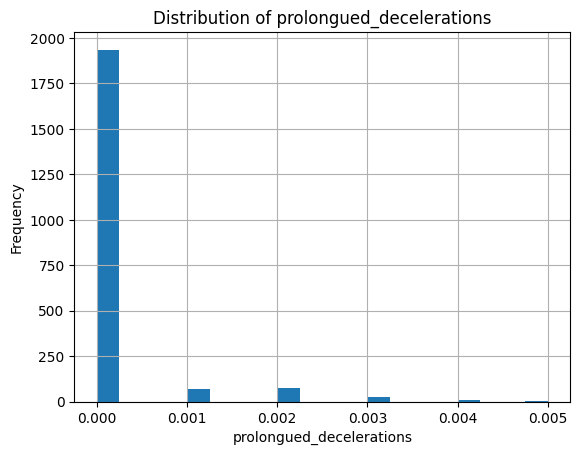

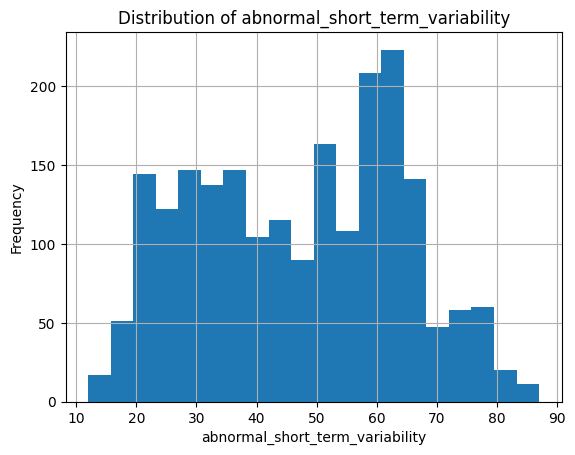

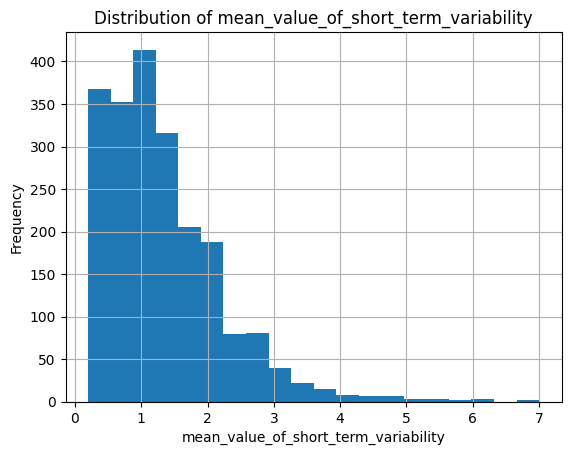

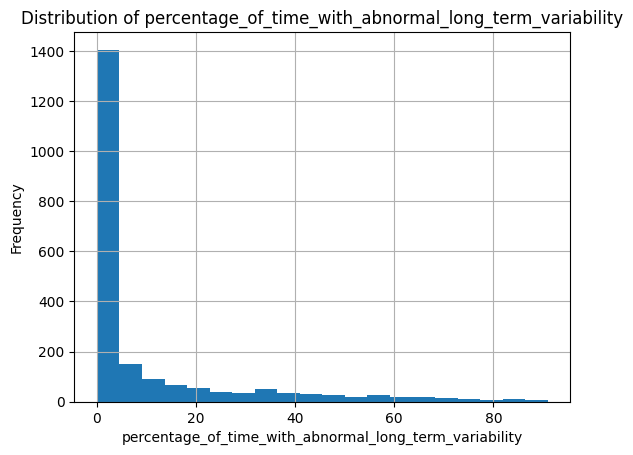

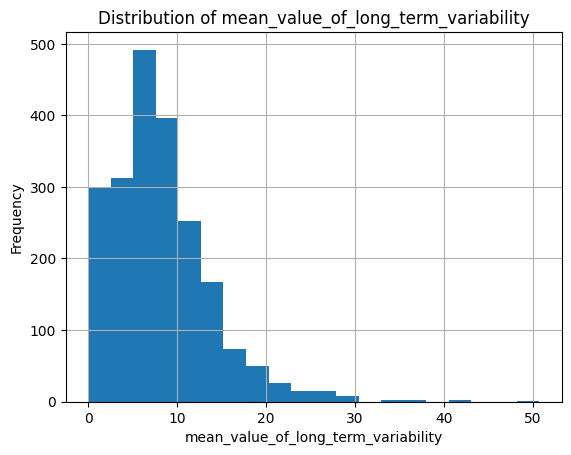

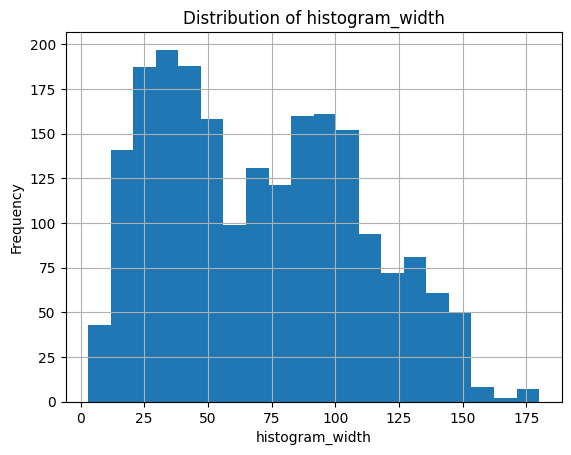

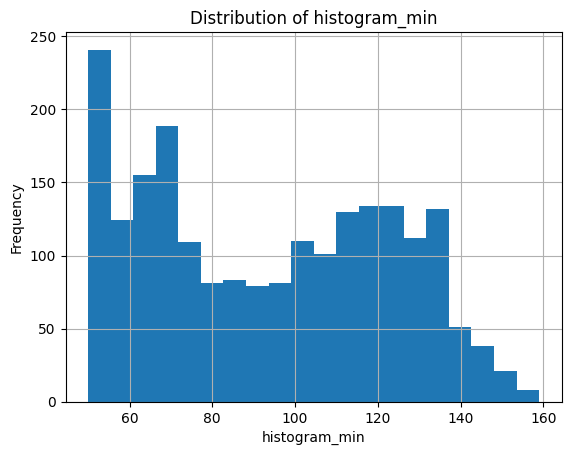

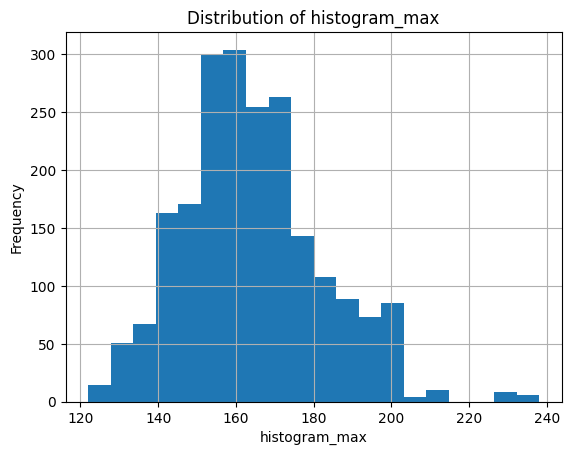

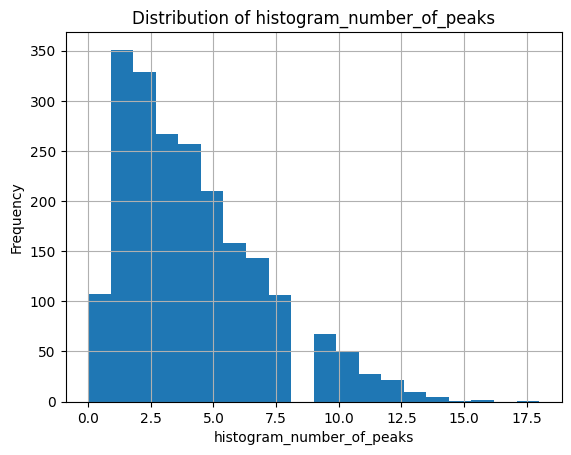

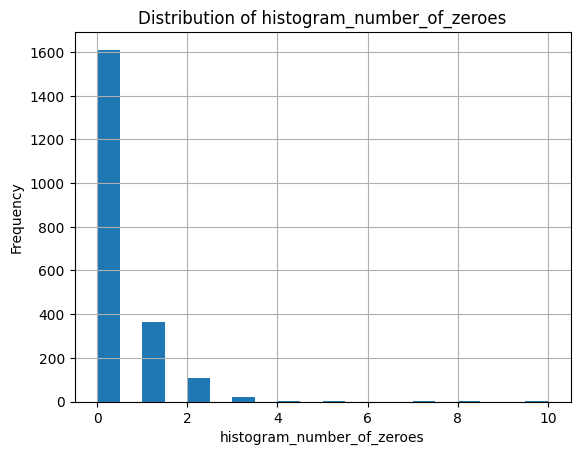

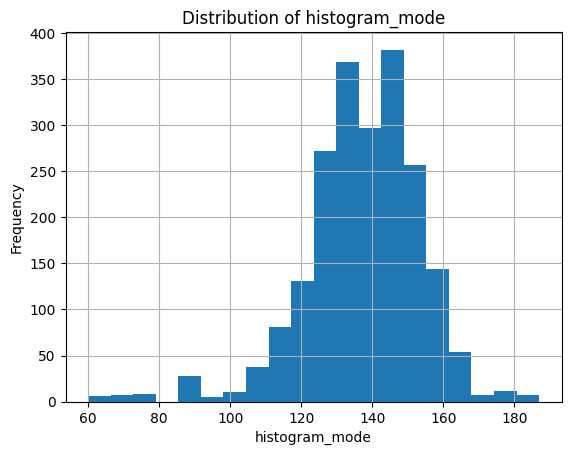

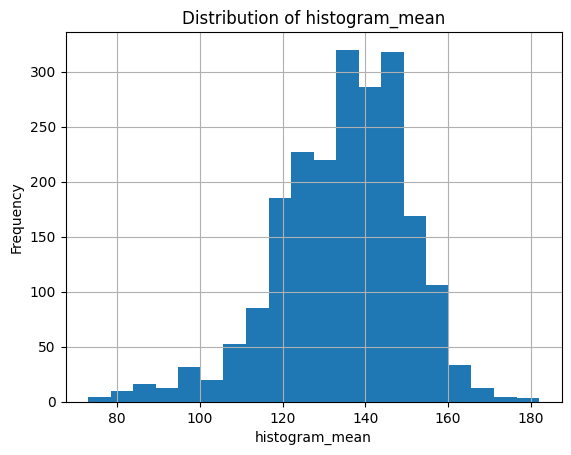

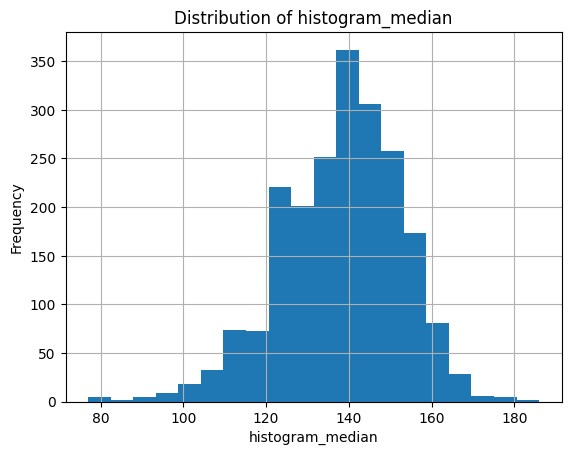

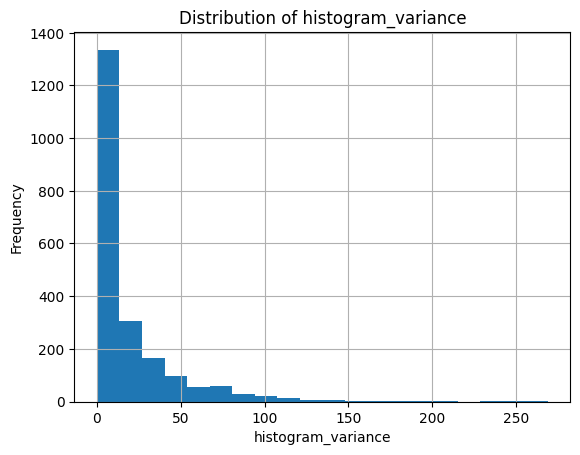

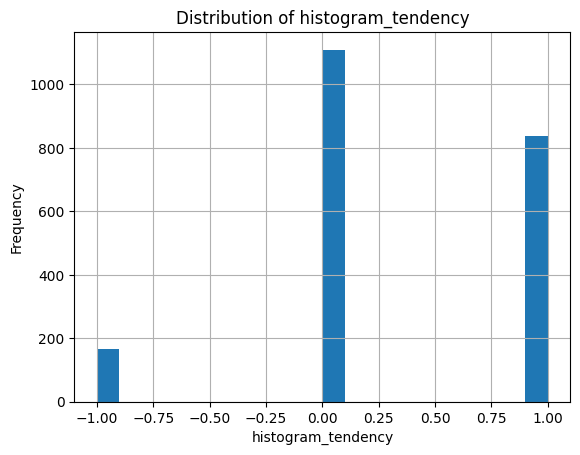

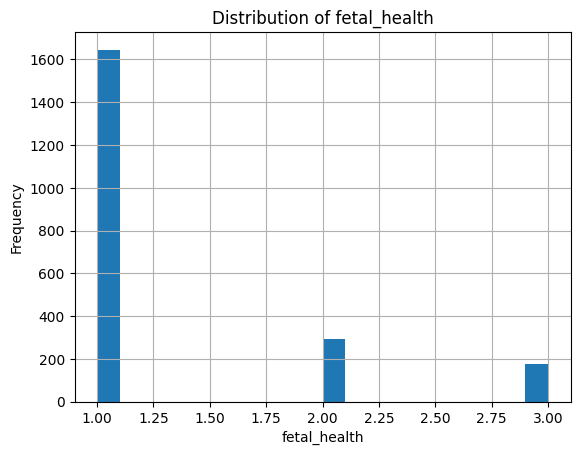

In [11]:
for column in df.columns:
    df[column].hist(bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
df["fetal_health"].value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

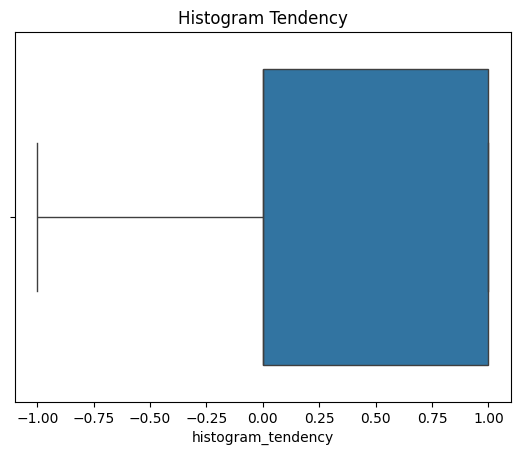

In [13]:
sns.boxplot(data=df, x='histogram_tendency')
plt.title('Histogram Tendency')
plt.show()

In [14]:
df["histogram_number_of_zeroes"].value_counts()

histogram_number_of_zeroes
0.0     1611
1.0      366
2.0      108
3.0       21
4.0        2
5.0        2
10.0       1
8.0        1
7.0        1
Name: count, dtype: int64

In [15]:
df["prolongued_decelerations"].value_counts()

prolongued_decelerations
0.000    1935
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: count, dtype: int64

In [16]:
df["severe_decelerations"].value_counts()

severe_decelerations
0.000    2106
0.001       7
Name: count, dtype: int64

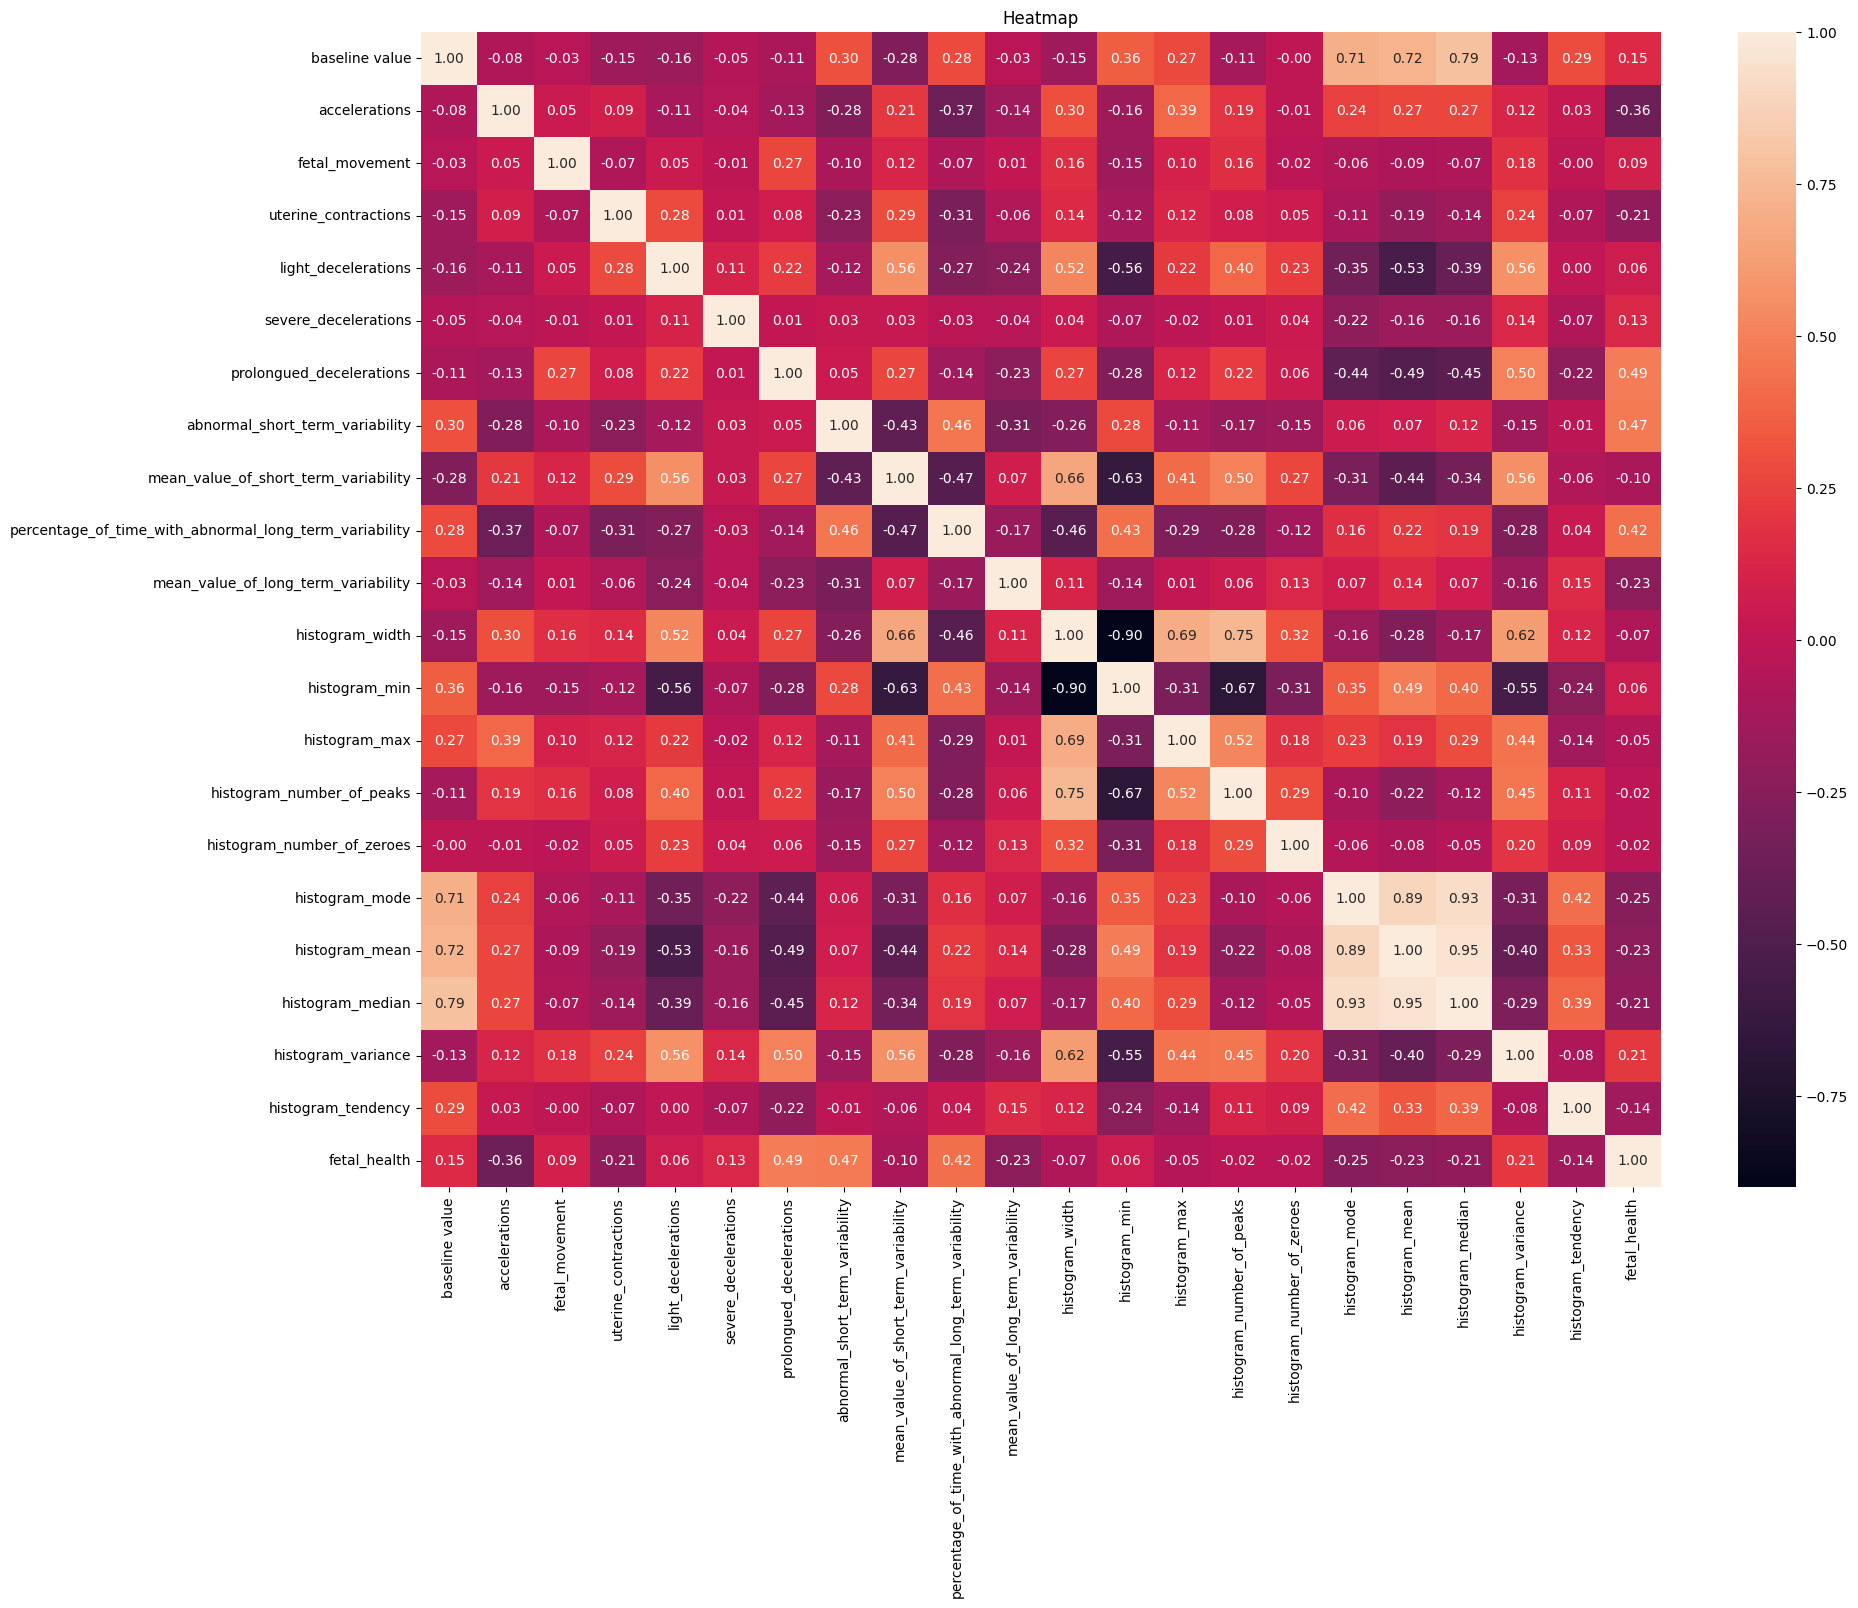

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True ,fmt='.2f')
plt.title('Heatmap')
plt.show()

In [18]:
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]  

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_train_ros_scaled = scaler.fit_transform(X_train_ros)
X_train_rus_scaled = scaler.fit_transform(X_train_rus)

X_test_scaled = scaler.transform(X_test)